In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/Users/aayush/imc-prosperity-2025/csvs/tutorial_round.csv", sep=";")

In [6]:
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,RAINFOREST_RESIN,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.0
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,0.0
3,-1,100,RAINFOREST_RESIN,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,200,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0


In [7]:
df.describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,4000.0,4000.000000,4000.000000,4000.000000,1846.000000,1846.000000,384.000000,384.000000,4000.000000,4000.000000,1938.000000,1938.000000,348.000000,348.000000,4000.000000,4000.000000
mean,-1.0,99950.000000,6007.152750,15.172250,8344.414410,20.513543,9309.453125,23.033854,6011.953000,14.562000,8014.954076,21.063467,8949.626437,24.123563,6009.552875,250.174126
std,0.0,57742.237933,3989.974104,12.152099,3232.763126,9.931231,2239.028300,7.093659,3992.027588,11.866797,3454.437767,9.411413,2707.907985,6.258985,3991.000738,393.182093
min,-1.0,0.000000,2009.000000,1.000000,2010.000000,1.000000,2010.000000,1.000000,2012.000000,1.000000,2014.000000,1.000000,2016.000000,1.000000,2011.000000,-48.000000
25%,-1.0,49975.000000,2018.000000,2.000000,9995.000000,20.000000,9995.000000,22.000000,2020.000000,2.000000,10000.000000,21.000000,10005.000000,22.000000,2019.000000,-48.000000
50%,-1.0,99950.000000,6011.500000,21.000000,9995.000000,24.000000,9995.000000,24.000000,6013.500000,20.000000,10005.000000,24.000000,10005.000000,25.000000,6012.500000,14.000000
75%,-1.0,149925.000000,9996.000000,26.000000,9995.000000,27.000000,9995.000000,28.000000,10004.000000,26.000000,10005.000000,27.000000,10005.000000,28.000000,10000.000000,535.441772
max,-1.0,199900.000000,10002.000000,40.000000,10000.000000,35.000000,9998.000000,32.000000,10005.000000,32.000000,10005.000000,32.000000,10005.000000,32.000000,10003.500000,1171.890625


In [8]:
df.isnull().sum()

day                   0
timestamp             0
product               0
bid_price_1           0
bid_volume_1          0
bid_price_2        2154
bid_volume_2       2154
bid_price_3        3616
bid_volume_3       3616
ask_price_1           0
ask_volume_1          0
ask_price_2        2062
ask_volume_2       2062
ask_price_3        3652
ask_volume_3       3652
mid_price             0
profit_and_loss       0
dtype: int64

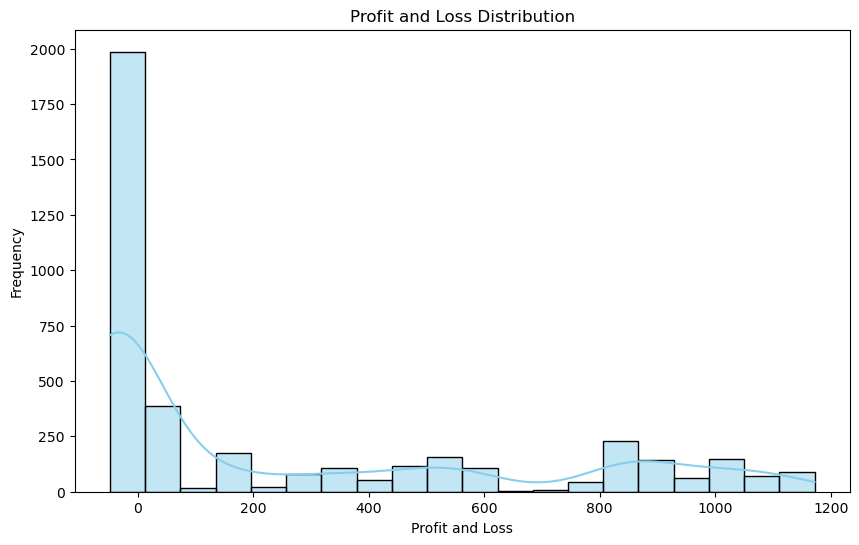

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['profit_and_loss'], bins=20, kde=True, color="skyblue")
plt.title("Profit and Loss Distribution")
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency")
plt.show()

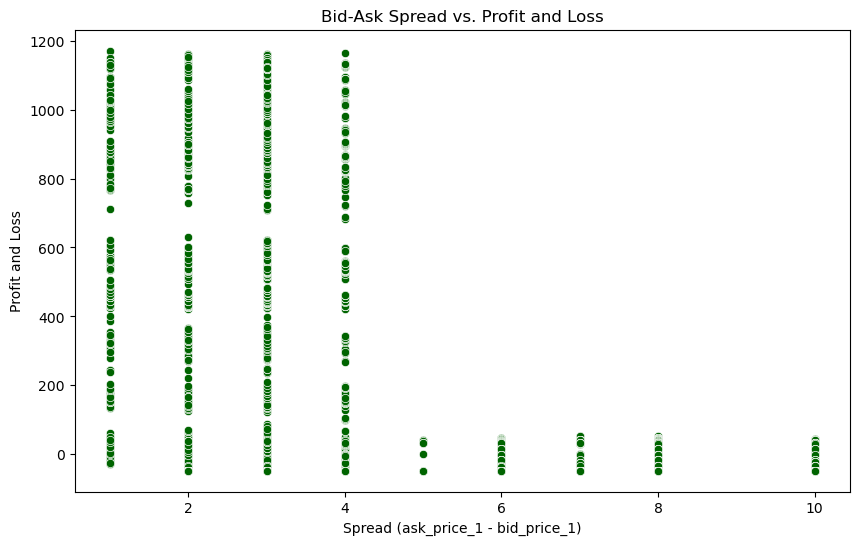

In [12]:
df["spread"] = df["ask_price_1"] - df["bid_price_1"]
plt.figure(figsize=(10, 6))
sns.scatterplot(x="spread", y="profit_and_loss", data=df, color="darkgreen")
plt.title("Bid-Ask Spread vs. Profit and Loss")
plt.xlabel("Spread (ask_price_1 - bid_price_1)")
plt.ylabel("Profit and Loss")
plt.show()


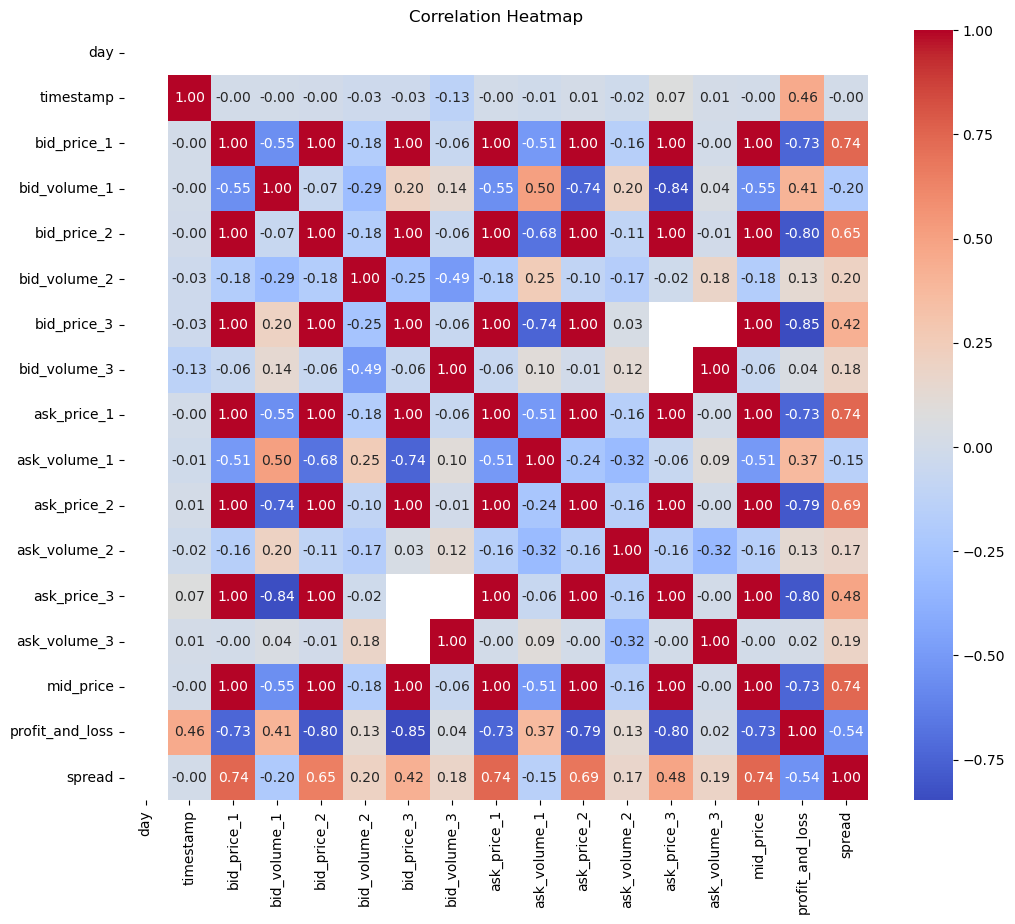

In [14]:
#  Correlation heatmap of numeric columns to understand relationships.
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
if 'order_size' in df.columns:
    avg_profit = df.groupby('order_size')['profit_and_loss'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=avg_profit, x='order_size', y='profit_and_loss', marker='o', color="purple")
    plt.title("Average Profit vs. Order Size")
    plt.xlabel("Order Size")
    plt.ylabel("Average Profit")
    plt.show()